# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [36]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [37]:
# Read the Mapbox API key
load_dotenv('my_key.env')
map_box_api = os.getenv("my_key")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [38]:
# Import the necessary CSVs to Pandas DataFrames
# YOUR CODE HERE!
#Importing CSV
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

#Housing Units per Neighboorhood Data
unit = sfo_data.drop(columns=['neighborhood','sale_price_sqr_foot', 'gross_rent'])
units_per_year = unit.groupby('year').mean()

#Total Average Sales and Rent per year
sales = sfo_data.drop(columns=['neighborhood','housing_units'])
average_sale = sales.groupby('year').mean()

#Average Sales and Rent Data per year by Neighboorhood
sf_data = pd.read_csv(file_path, index_col="year")
nh_sale = sf_data.drop(columns=['housing_units', 'gross_rent'])
nh_rent = sf_data.drop(columns=['housing_units', 'sale_price_sqr_foot'])

#Most Expensive Neighborhoods
nh_data = pd.read_csv(file_path)
nh_data.drop(columns="year", inplace=True)
nh_price = nh_data.groupby('neighborhood').mean()
nh_price.sort_values(by='sale_price_sqr_foot', ascending=False, inplace=True)
most_expensive = nh_price[0:10]

#Reading Coordinates Data
nh_coordinates = pd.read_csv('neighborhoods_coordinates.csv')

#Creating Data frame to be concatted
nh_data_2 = pd.read_csv(file_path)
nh_data_2.drop(columns="year", inplace=True)
nh_data_avg = nh_data_2.groupby('neighborhood').mean()
nh_data_avg.reset_index(inplace=True)

#Merging the data for map
merge = [nh_coordinates, nh_data_avg]
merged_data = pd.concat(merge, axis=1)
merged_data.drop(columns='neighborhood', inplace=True)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [39]:
# Define Panel Visualization Functions
def housing_units_per_year():
    units_per_year_plot = units_per_year.plot.bar(title= "San Francisco housing units for 2010 - 2016")
    return units_per_year_plot
    
    #"""Housing Units Per Year."""
    
    # YOUR CODE HERE!


def average_gross_rent():
    avg_rent = average_sale['gross_rent'].plot(title = "Average Montly Rent for 2010-2016")
    return avg_rent
    #"""Average Gross Rent in San Francisco Per Year."""
    

    # YOUR CODE HERE!

def average_gross_sale():
    avg_sale = average_sale['sale_price_sqr_foot'].plot(title = "Average Sale Price Per Square Foot for 2010-2016")
    return avg_sale


def average_sales_by_neighborhood():
    nh_sales_plot = nh_sale.hvplot(x='year',
                                  value_label='Year',
                                  y ='sale_price_sqr_foot',
                                  groupby='neighborhood',
                                  kind='line')
    return nh_sales_plot
    #"""Average Sales Price Per Year."""
    
    # YOUR CODE HERE!



def average_rent_by_neighborhood():
    avg_rent_plot = nh_rent_plot = nh_rent.hvplot(x='year',
                                             value_label='Year',
                                             y ='gross_rent',
                                             groupby='neighborhood',
                                             kind='line')
    return avg_rent_plot
    """Average Prices by Neighborhood."""
    
    # YOUR CODE HERE!



def top_most_expensive_neighborhoods():
    most_expensive_plot = most_expensive.hvplot(x='neighborhood',
                                                xlabel='Neighborhood',
                                                y='sale_price_sqr_foot',
                                                ylabel='Avg Sales Price Per Square Foot',
                                                rot=90,
                                                kind='bar',
                                                height=500)
    return most_expensive_plot
    #"""Top 10 Most Expensive Neighborhoods."""

    # YOUR CODE HERE!


def most_expensive_neighborhoods_rent_sales():
    sfo_data_plot = sfo_data.hvplot.bar(x='year',
                                        y=['gross_rent', 'sale_price_sqr_foot'],
                                        groupby='neighborhood',
                                        rot=90,height = 500,
                                        legend='top_left',
                                        xlabel = "Year",
                                        ylabel="Price per Dollars",
                                        title="San Francisco Neighboorhood Gross Rent & Sales Price Per Foot")
    return sfo_data_plot
    #"""Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    # YOUR CODE HERE!

    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    # YOUR CODE HERE!



def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!



def neighborhood_map():
    map_plot = px.scatter_mapbox(merged_data,
                                 lat="Lat",
                                 lon="Lon",
                                 size="sale_price_sqr_foot",
                                 color="gross_rent",
                                 hover_name='Neighborhood',
                                 zoom=10
)
    return map_plot
    """Neighborhood Map."""

    # YOUR CODE HERE!


def sunburst():
    """Sunburst Plot."""
    
    # YOUR CODE HERE!


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

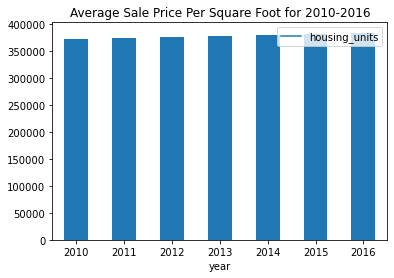

In [65]:
# Create a Title for the Dashboard

map_page = pn.Column(
        "Average Price Per Square foot and Gross Rent in San Francisco", neighborhood_map()
        )
market_analysis = pn.Row("Market Analysis For Rent and Sales Price",
                         housing_units_per_year(),
                         average_gross_rent(),
                         average_gross_sale())

neighboohood_analysis = pn.Column("Sales and Rent Price by Year",
                                 average_sales_by_neighborhood(),
                                 average_rent_by_neighborhood())

expensive = pn.Column("San Francisco's Most Expensive Neighborhoods",
                      top_most_expensive_neighborhoods(),
                      most_expensive_neighborhoods_rent_sales())

# Create a tab layout for the dashboard

sf_housing_dashboard = pn.Tabs(
    ("Welcome", map_page), ("Market Analysis", market_analysis),("Neighborhood Analysis",neighboohood_analysis),("10 Most Expensive", expensive))

## Serve the Panel Dashboard

In [66]:
# Serve the# dashboard
# YOUR CODE HERE!
sf_housing_dashboard.servable()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
    [1] Row
        [0] Markdown(str)
        [1] Str(AxesSubplot)
        [2] Str(AxesSubplot)
        [3] Str(AxesSubplot)
    [2] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [2] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
    [3] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
        [2] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [46]:
#housing_units_per_year()

In [47]:
#average_gross_rent()

In [48]:
#average_gross_sale()

In [49]:
#average_sales_by_neighborhood()

In [50]:
#average_rent_by_neighborhood()

In [51]:
#top_most_expensive_neighborhoods()

In [52]:
#most_expensive_neighborhoods_rent_sales()

In [53]:
#neighborhood_map().show()

In [ ]:
# parallel_categories()

In [ ]:
# parallel_coordinates()

In [ ]:
# sunburst()